In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import aplpy
from astropy import units as u
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
import pandas as pd
pd.set_option('display.max_columns', 100)
import seaborn as sns
sns.set(font="times",font_scale=1.7,style="ticks")
import matplotlib as mpl
mpl.rc('text', usetex=True)
from zero_point import zpt
zpt.load_tables()
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
cc = pd.read_csv("../files/target_2000pc.csv")
sc = pd.read_csv("../files/star_catalog.csv")
obs_condition = (cc.GLON>5)&(cc.GLON<150)
sc

,recno,RA_ICRS,DE_ICRS,GaiaDR2,GLON,GLAT,Plx,e_Plx,pmRA*,e_pmRA*,pmDE,e_pmDE,RV,e_RV,o_Gmag,Gmag,BP-RP,proba,Cluster,Teff50,_RA.icrs,_DE.icrs
0,1,58.143841,11.260750,36629890579758592,177.907280,-31.674216,28.598377,0.061629,176.685800,0.121513,-8.666746,0.091208,NaN,NaN,335,12.626208,2.572736,1.0,Melotte_25,3304.704102,58.143065,11.260788
1,2,59.560424,12.627971,38329666836450304,177.799602,-29.729642,21.946148,0.102519,129.435447,0.261159,-12.309865,0.137580,NaN,NaN,325,15.111156,3.214545,1.0,Melotte_25,2926.900146,59.559853,12.628024
2,3,58.756584,12.485542,38354680725946240,177.315636,-30.408231,21.721823,0.040784,131.227555,0.080865,-10.229084,0.059181,36.315981,0.203866,315,9.766113,1.295699,1.0,Melotte_25,4862.672363,58.756005,12.485586
3,4,58.444378,13.391927,38670343642226816,176.304205,-30.020668,24.153702,0.105972,148.357283,0.221603,-13.908053,0.128311,NaN,NaN,331,14.832144,3.200334,1.0,Melotte_25,2915.785400,58.443721,13.391987
4,5,60.187865,13.906263,38929141191925760,177.176162,-28.421933,21.241981,0.531954,128.295406,0.972919,-16.179040,0.647393,NaN,NaN,366,13.329974,2.986785,1.0,Melotte_25,3051.102051,60.187295,13.906333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234123,234124,313.369898,-6.043327,6913211662091972992,41.985412,-29.824015,1.773405,0.029018,5.124525,0.048707,2.400900,0.035036,NaN,NaN,363,13.767813,1.023584,0.9,UPK_51,5872.410600,313.369876,-6.043337
234124,234125,313.302141,-6.028205,6913214823187911808,41.964491,-29.757388,1.821802,0.075199,4.893462,0.125018,1.933438,0.089092,NaN,NaN,379,16.425526,1.668467,1.0,UPK_51,4042.588000,313.302120,-6.028214
234125,234126,313.662996,-5.822918,6913591921316306304,42.367705,-29.978092,1.833667,0.035054,5.472447,0.056999,2.517804,0.038130,NaN,NaN,415,15.029940,1.226877,0.9,UPK_51,5069.668000,313.662972,-5.822929
234126,234127,313.744759,-5.781422,6913597556312267648,42.454188,-30.030340,1.864715,0.033419,5.045746,0.054940,1.557335,0.039106,NaN,NaN,420,14.675908,1.137109,1.0,UPK_51,5440.247000,313.744738,-5.781429


In [3]:
if(0):
    plt.figure(figsize=(10,5))
    #plt.scatter(cc["_RA.icrs"],cc["_DE.icrs"],c=cc.GLON,cmap="coolwarm")
    plt.scatter(cc.GLON,cc.GLAT,c=cc["_RA.icrs"],cmap="magma")
    plt.colorbar()

In [4]:
c_search = []
for c_name in cc.Cluster[~obs_condition]:
    catalog = sc[sc.Cluster==c_name]
    if len(catalog)>500:
        c_search.append(c_name)

(-180.0, 180.0)

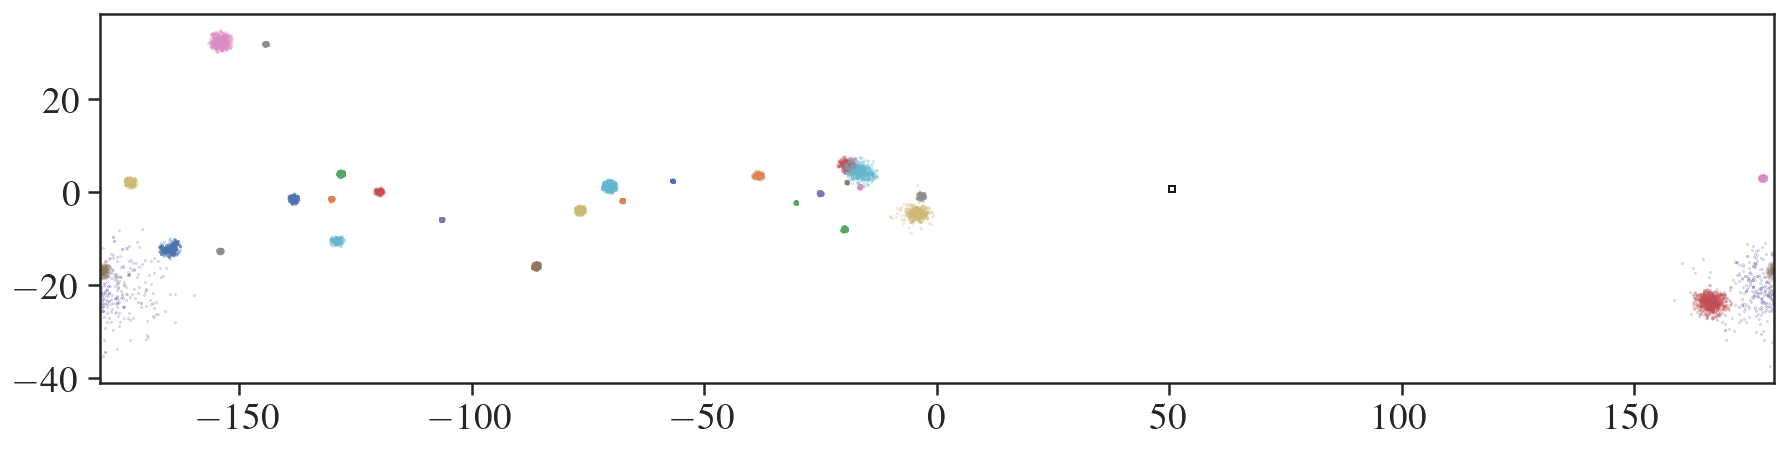

In [5]:
import matplotlib.patches as patches

fig,ax = plt.subplots(figsize=(15,6))
for c_name in c_search:
    catalog = sc[sc.Cluster==c_name]
    GLON = np.where(catalog.GLON>180,catalog.GLON-360,catalog.GLON)
    plt.scatter(GLON,catalog.GLAT,s=0.1,alpha=0.5)
    #print(c_name,len(catalog))
r = patches.Rectangle(xy=(50, 0), width=1.26, height=1.26, color="k",fill=False)
ax.add_patch(r)
plt.axis('scaled')
ax.set_aspect('equal')
plt.xlim(-180,180)

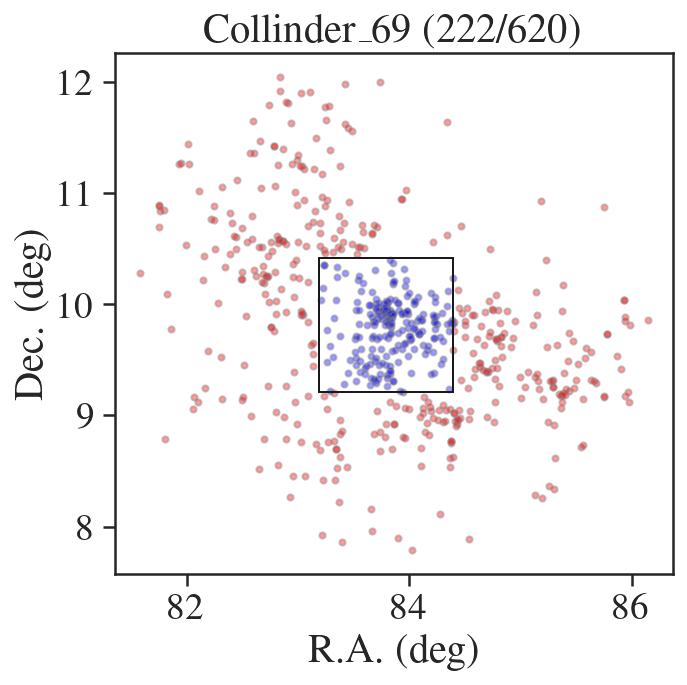

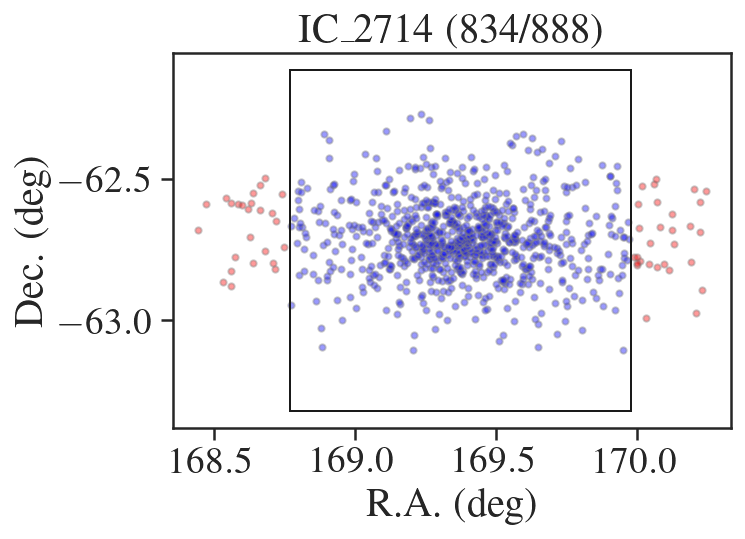

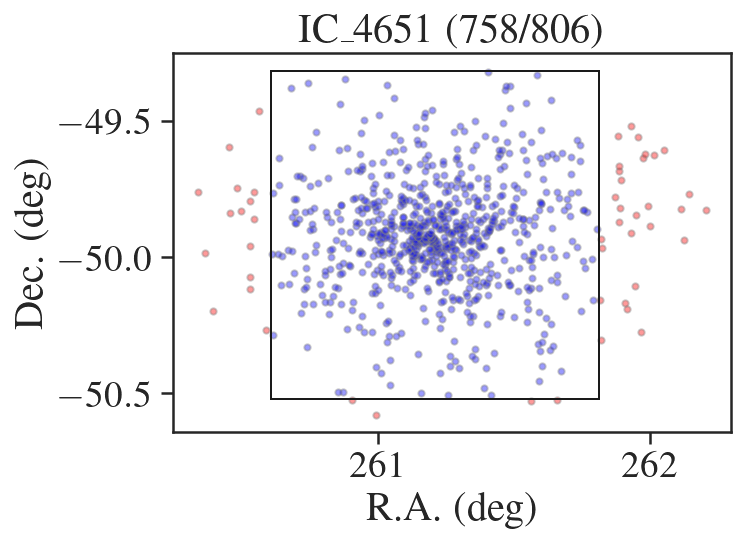

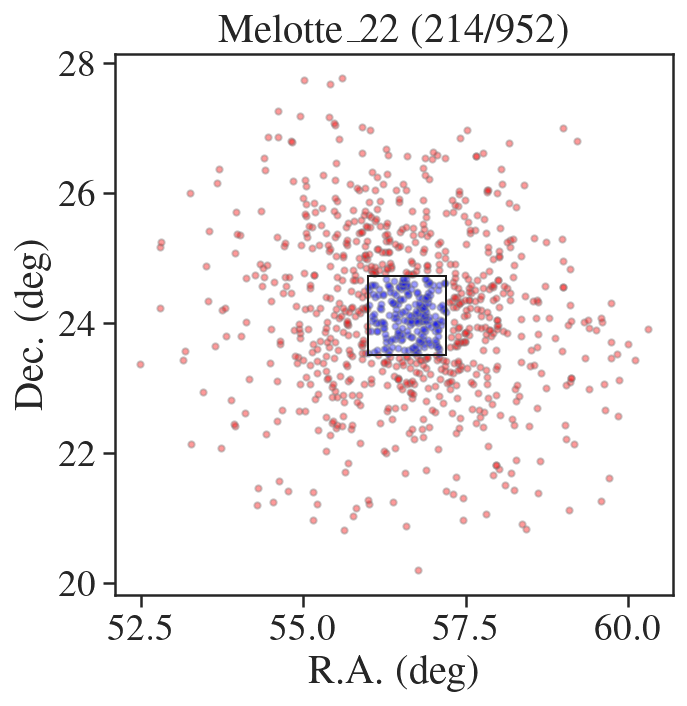

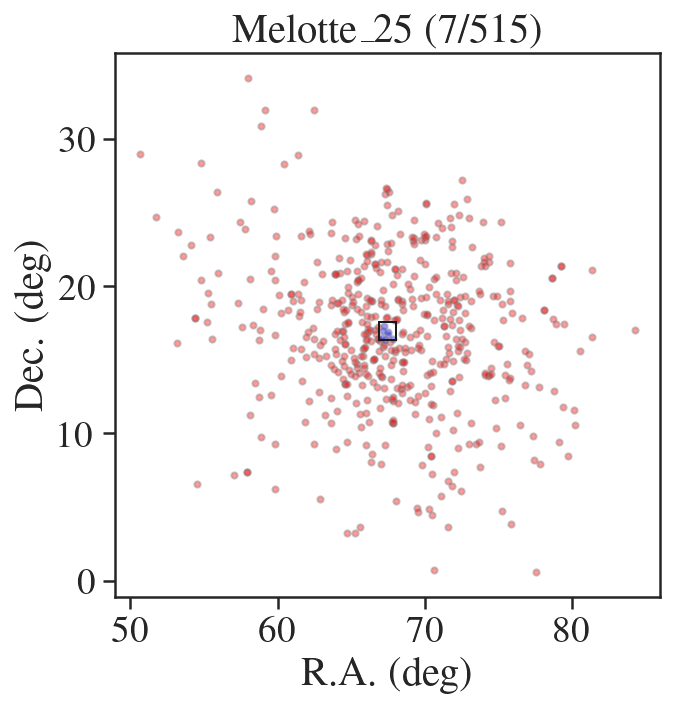

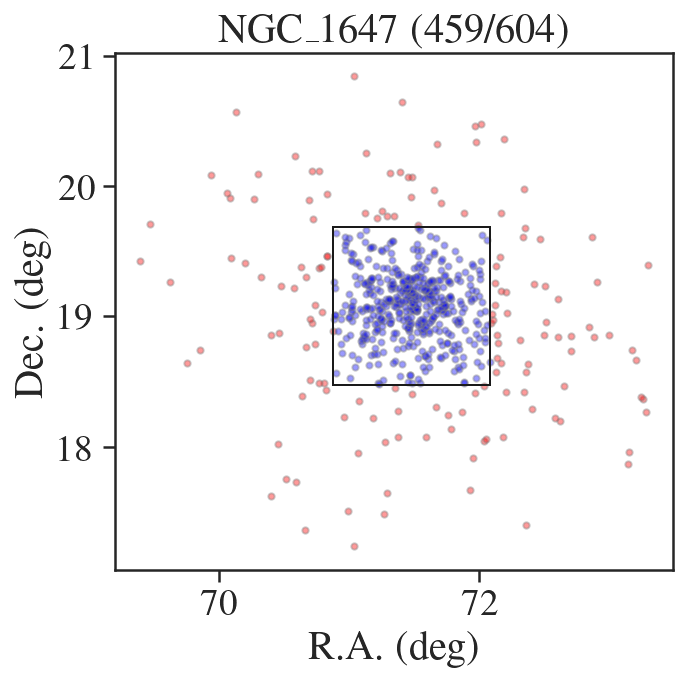

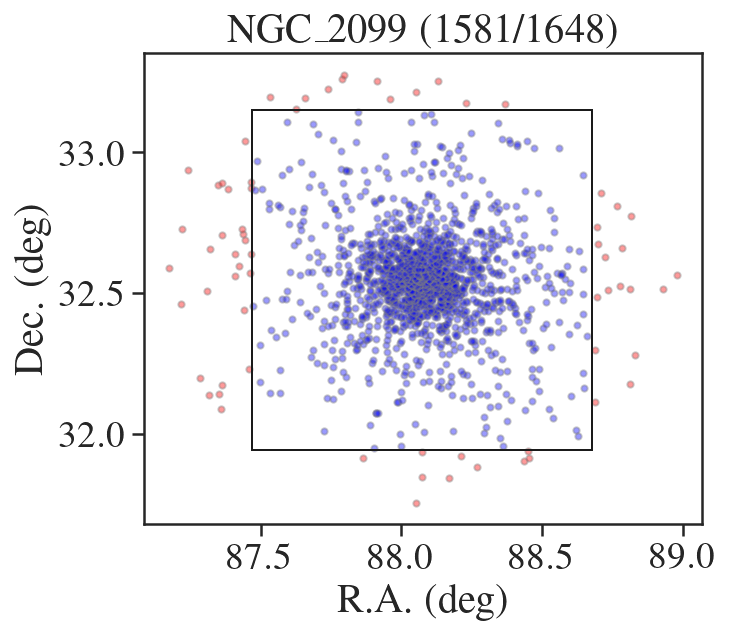

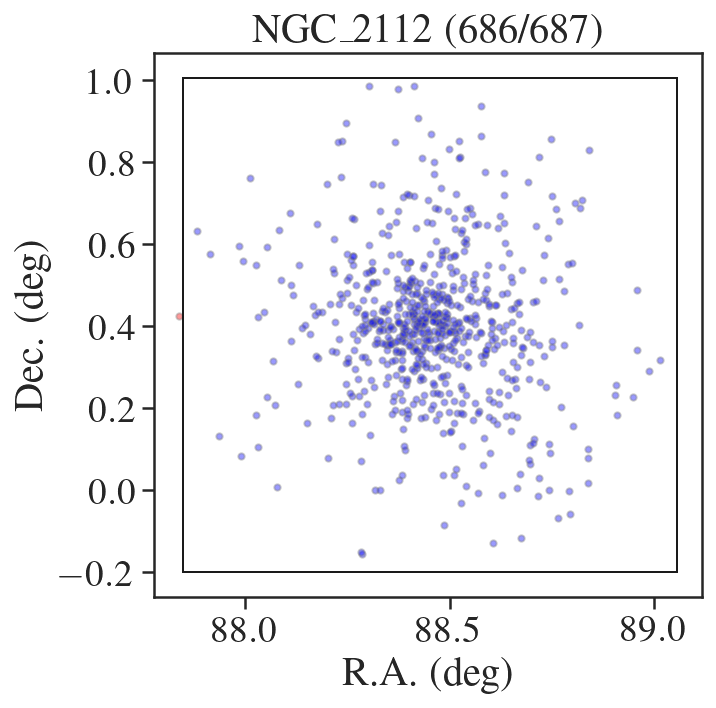

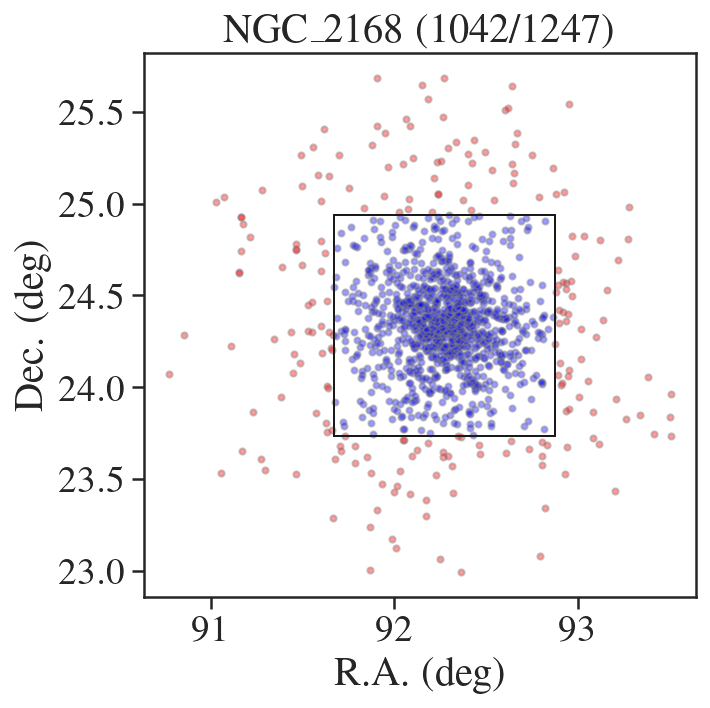

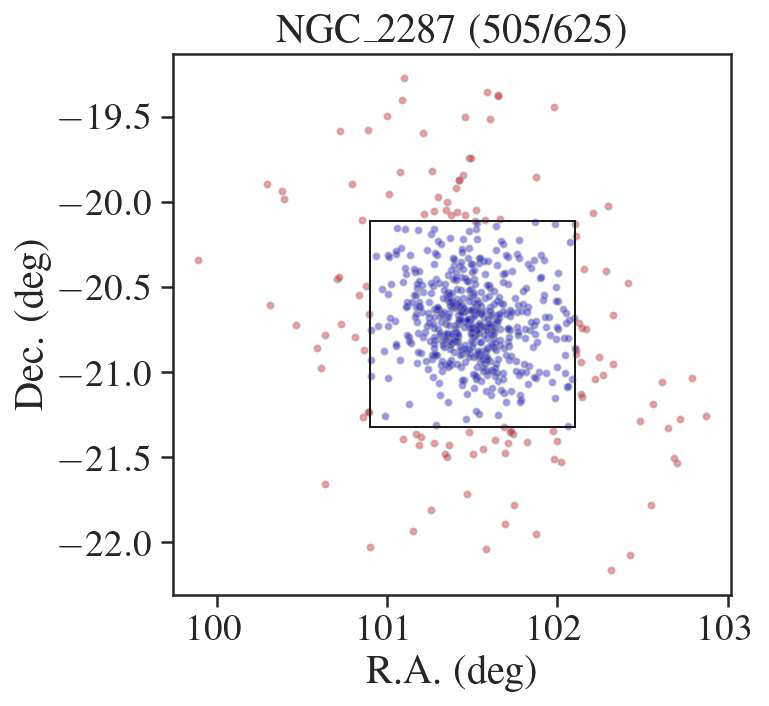

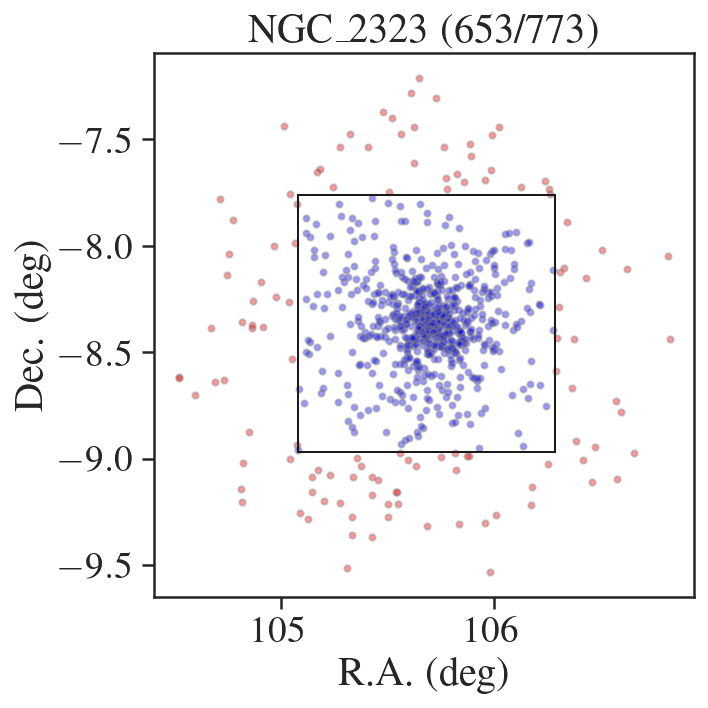

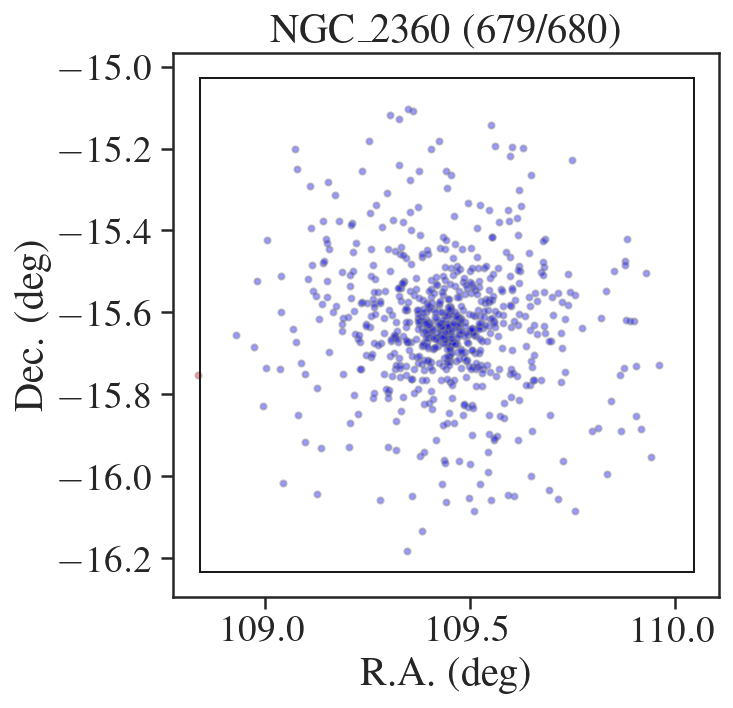

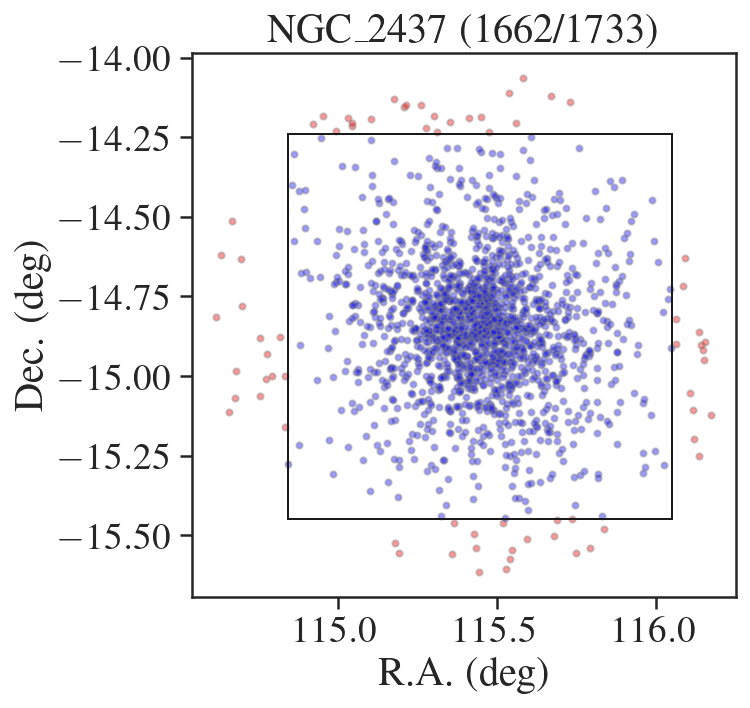

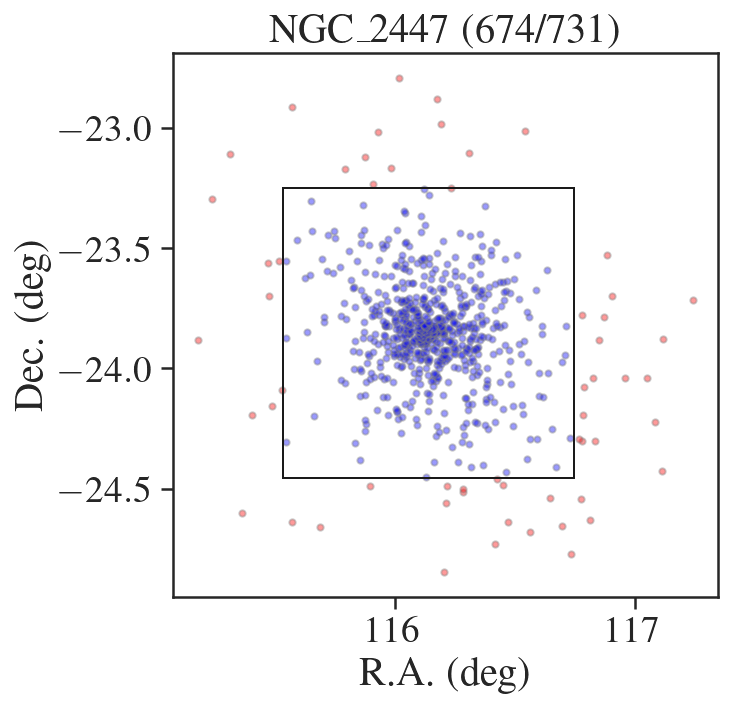

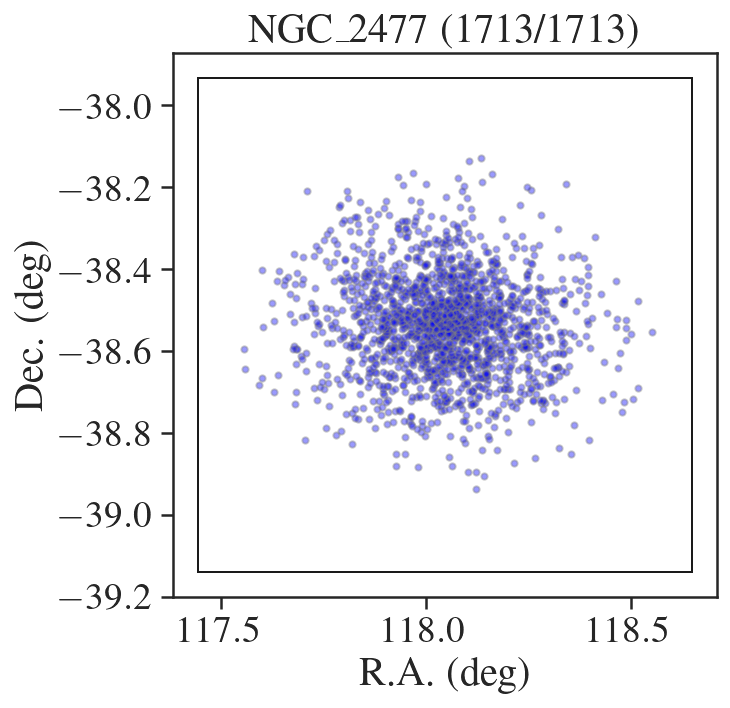

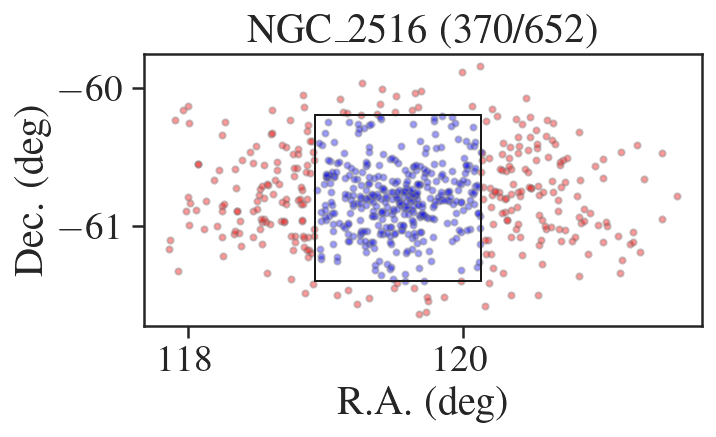

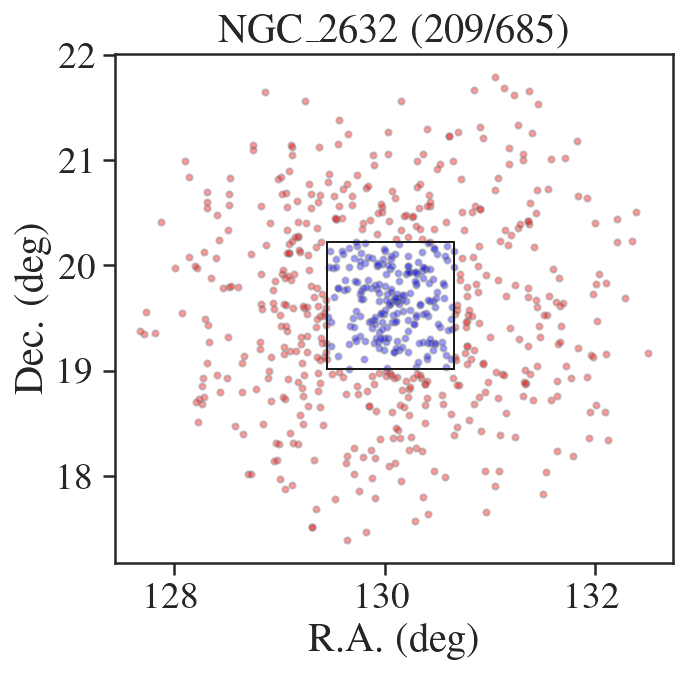

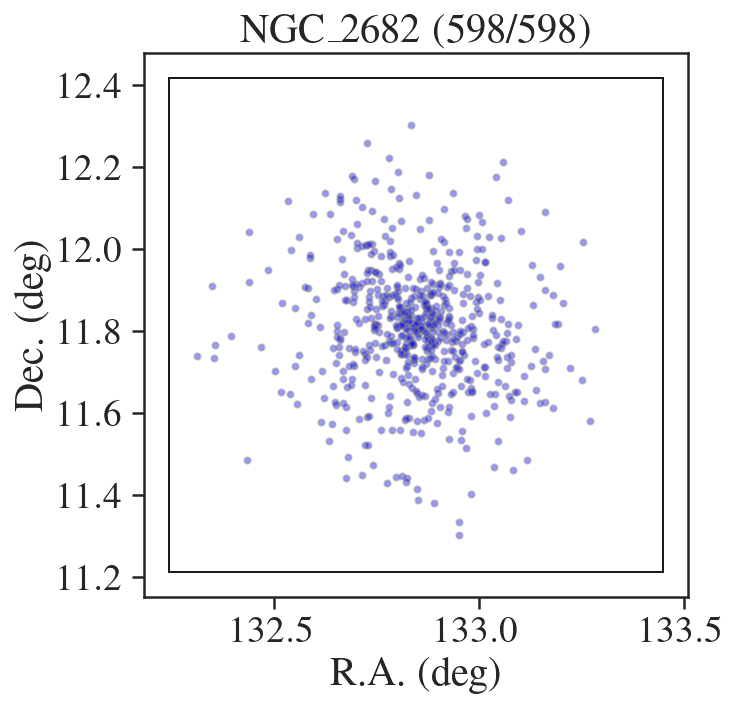

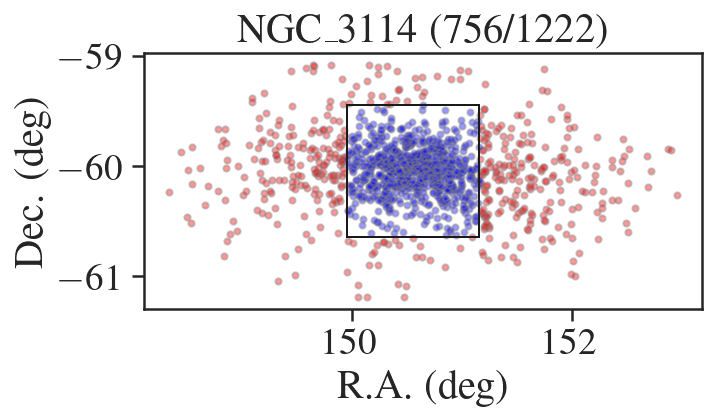

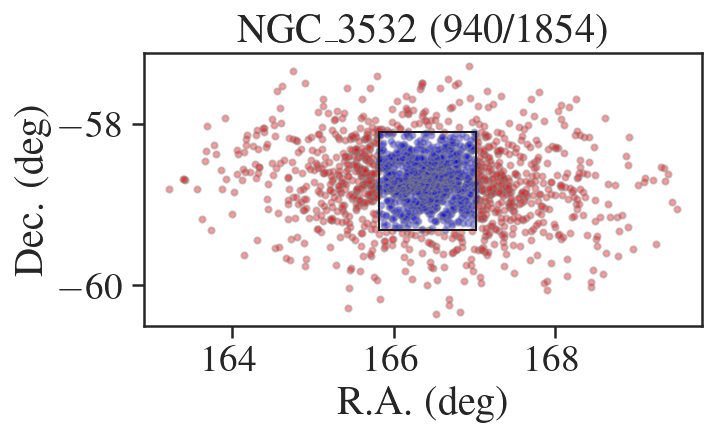

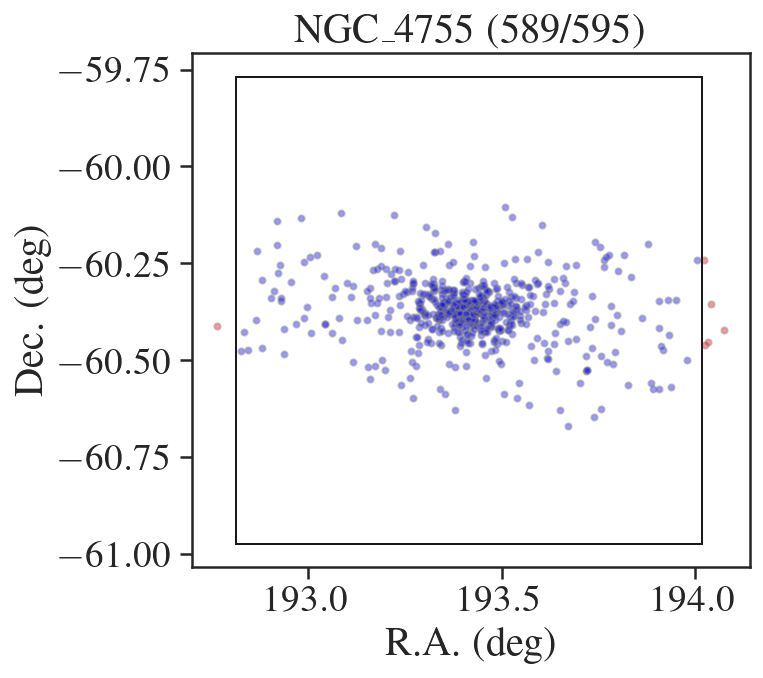

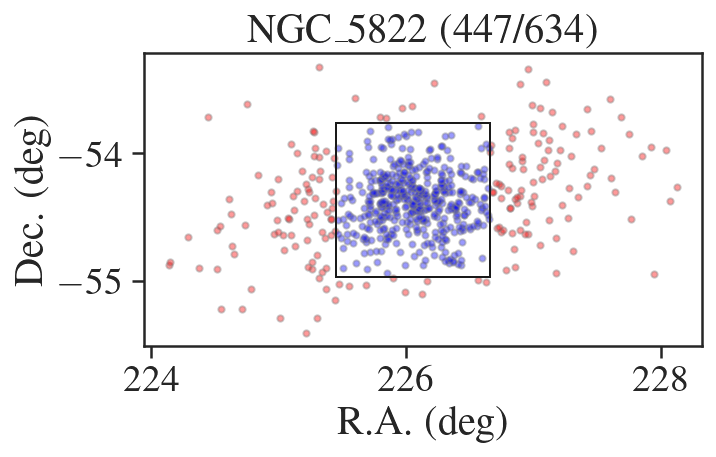

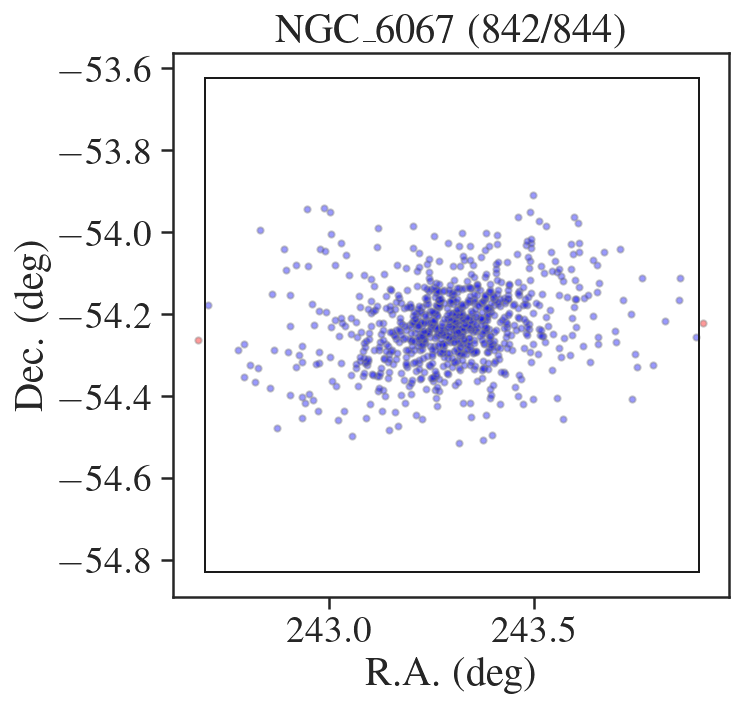

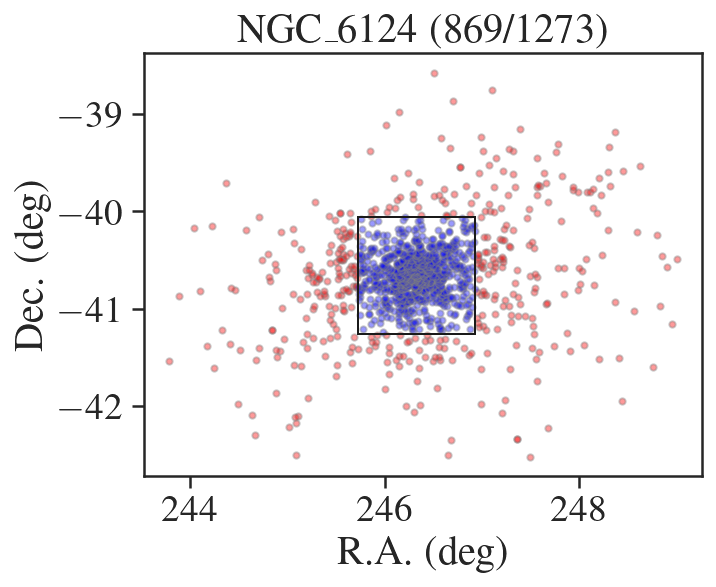

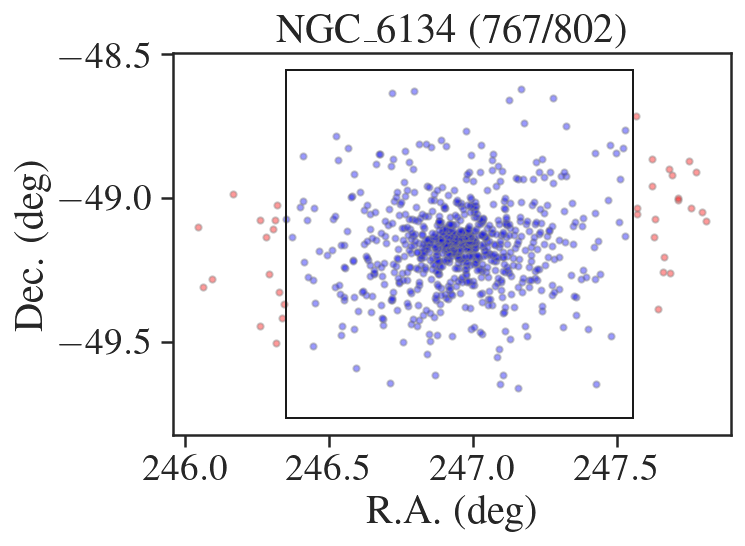

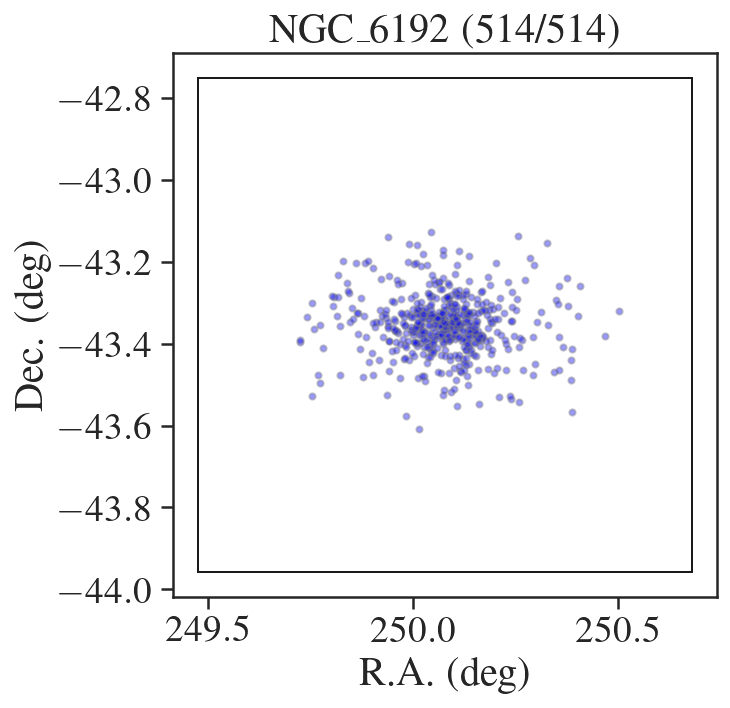

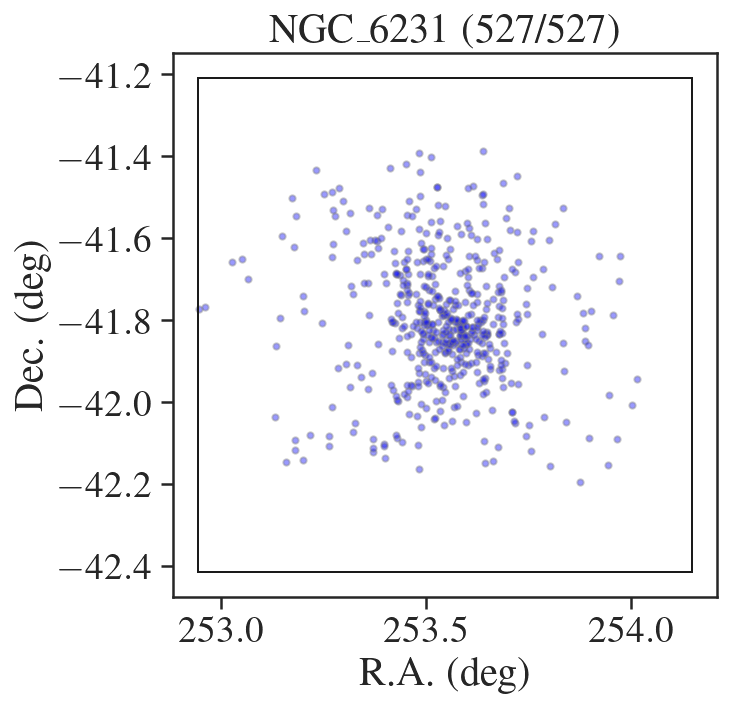

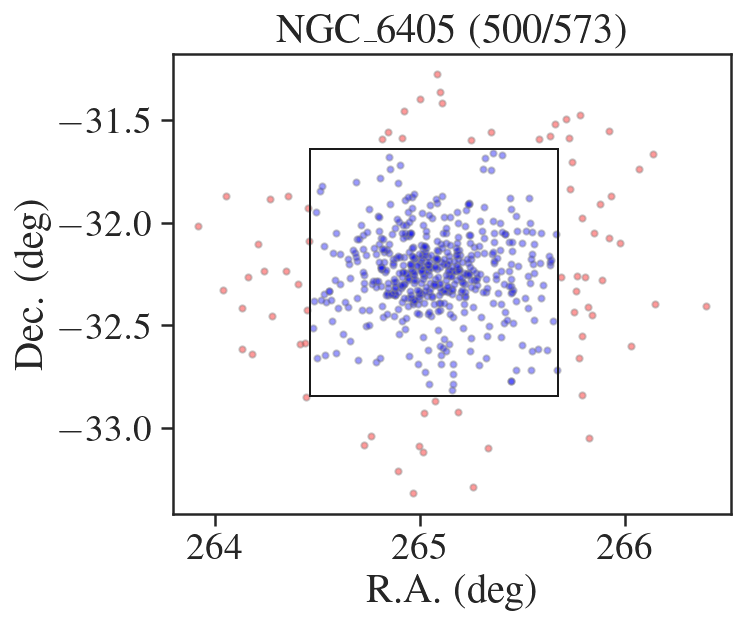

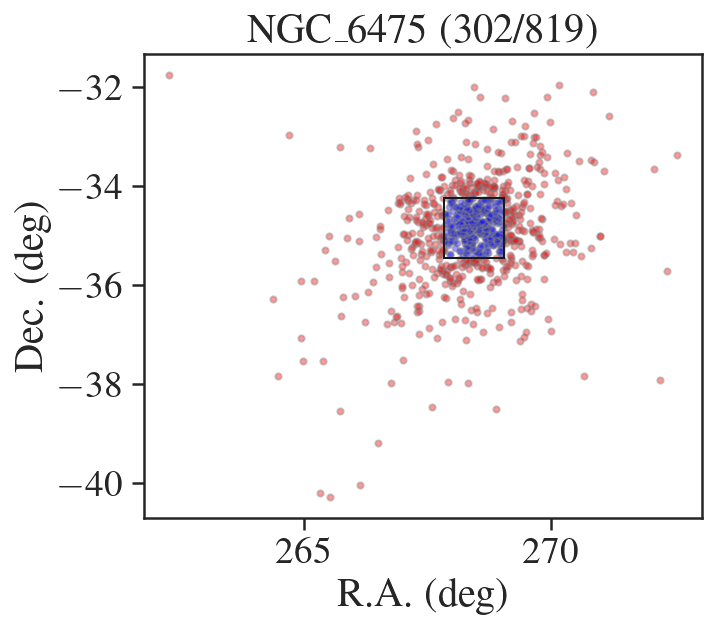

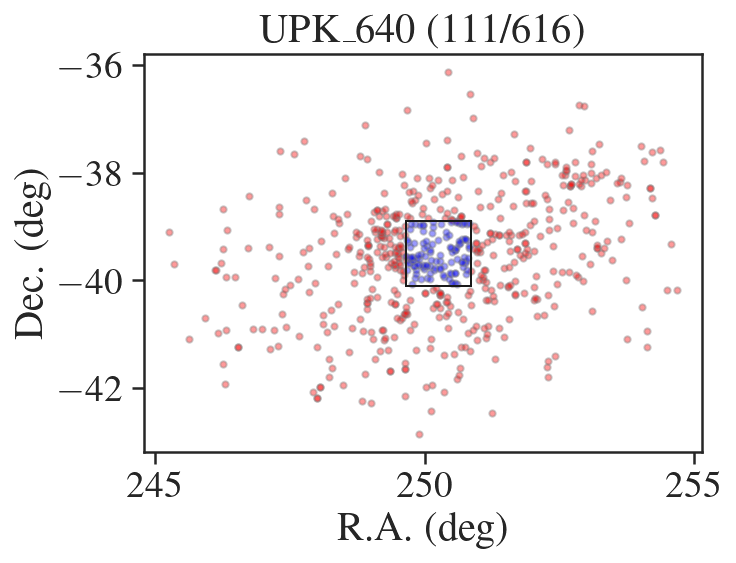

In [6]:
for c_name in c_search:
    c_sc = sc[sc.Cluster==c_name]
    c_cc = cc[cc.Cluster==c_name]
    RA_s,Dec_s = c_sc["_RA.icrs"].values,c_sc["_DE.icrs"].values
    
    RA_l,RA_u = np.array([c_cc["_RA.icrs"]-0.603,c_cc["_RA.icrs"]+0.603])
    Dec_l,Dec_u = np.array([c_cc["_DE.icrs"]-0.603,c_cc["_DE.icrs"]+0.603])
    in_cond  = (RA_s>RA_l)&(RA_s<RA_u)&(Dec_s>Dec_l)&(Dec_s<Dec_u)
    c_sc_in  = c_sc[in_cond]
    c_sc_out = c_sc[~in_cond]
    
    fig,ax = plt.subplots(figsize=(5,5))
    plt.scatter(c_sc_out["_RA.icrs"],c_sc_out["_DE.icrs"],s=10,alpha=0.4,edgecolor="gray",c="red")
    plt.scatter(c_sc_in["_RA.icrs"],c_sc_in["_DE.icrs"],s=10,alpha=0.4,edgecolor="gray",c="blue")
    r = patches.Rectangle(xy=(RA_l, Dec_l), width=1.206, height=1.206, color="k",fill=False)
    ax.add_patch(r)
    plt.axis('scaled')
    ax.set_aspect('equal')
    ax.set_title(str(c_name)+" (%d/%d)"%(len(c_sc_in),(len(c_sc))))
    ax.set_xlabel("R.A. (deg)")
    ax.set_ylabel("Dec. (deg)")
    Name = c_name.replace(" ","")
    fig.savefig("../fig/"+str(Name)+".png",bbox_inches="tight",dpi=100)
    c_sc_in.to_csv("../match/"+str(Name)+".csv",index=False)
    plt.show()

In [7]:
cc[np.isin(cc.Cluster,c_search)].to_csv("../files/cluster_search.csv",index=False)